## NORMALIZAMOS EL DATASET

In [142]:
import torch
import pandas as pd

# Ruta al archivo
path = r"M:\UNIVERSIDAD 2025_2\INTELIGENCIA ATRIFICIAL\LAB5\csv_result_multiclase.csv"

# Leer dataset
df = pd.read_csv(path)

# Convertir a tensor de float32 (quita columnas no numéricas antes si es necesario)
data = torch.tensor(df.select_dtypes(include=['number']).values, dtype=torch.float32)

# Normalización Min-Max
min_vals, _ = torch.min(data, dim=0, keepdim=True)
max_vals, _ = torch.max(data, dim=0, keepdim=True)
normalized_data = (data - min_vals) / (max_vals - min_vals)

print("Original shape:", data.shape)
print("Normalized shape:", normalized_data.shape)
print(normalized_data[:5])  # primeras 5 filas normalizadas


Original shape: torch.Size([20001, 9])
Normalized shape: torch.Size([20001, 9])
tensor([[0.0000e+00, 3.3766e-01, 6.5321e-02, 1.3333e-01, 3.9894e-02, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.3333e-01],
        [5.0000e-05, 1.9481e-01, 6.5065e-02, 1.3333e-01, 2.0079e-02, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00],
        [1.0000e-04, 1.9481e-01, 6.5055e-02, 1.3333e-01, 5.2312e-02, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.5000e-04, 3.1169e-01, 6.5065e-02, 1.3333e-01, 1.0040e-01, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 3.3333e-01],
        [2.0000e-04, 5.1948e-01, 6.5720e-02, 1.3333e-01, 1.8758e-02, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00]])


## Modelos secuenciales

La forma más sencilla de definir una `red neuronal` en `Pytorch` es utilizando la clase `Sequentail`. Esta clase nos permite definir una secuencia de capas, que se aplicarán de manera secuencial (las salidas de una capa serán la entrada de la siguiente). Ésto ya lo conocemos de posts anteriores, ya que es la forma ideal de definir un `Perceptrón Multicapa`.

In [143]:
import torch.nn as nn

# OPCIÓN 1: Solo datos numéricos (7 características)
D_in = 7   # Solo las 7 columnas numéricas
H1 = 64
H2 = 32
D_out = 4

model = nn.Sequential(
    nn.Linear(D_in, H1),
    nn.ReLU(),
    nn.Linear(H1, H2),
    nn.ReLU(),
    nn.Linear(H2, D_out)
)

In [144]:
# OPCIÓN 2: Si usas get_dummies() para incluir variables categóricas
# D_in = 51  # 51 características después de one-hot encoding
# H1 = 64
# H2 = 32 
# D_out = 4

# model_with_dummies = nn.Sequential(
#     nn.Linear(51, H1),
#     nn.ReLU(),
#     nn.Linear(H1, H2),
#     nn.ReLU(),
#     nn.Linear(H2, D_out)
# )

In [145]:
outputs = model(torch.randn(600, 7))  # Cambiar de 16 a 51
print(outputs.shape)


torch.Size([600, 4])


In [146]:
print(outputs[0][:])

tensor([ 0.0299,  0.0289,  0.1070, -0.0482], grad_fn=<SliceBackward0>)


In [147]:
model

Sequential(
  (0): Linear(in_features=7, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=4, bias=True)
)

In [148]:
# model.to("cuda") NO LO USO YA QUE SOLO TENGO CPU

In [149]:
import pandas as pd

csv_path = r"M:\UNIVERSIDAD 2025_2\INTELIGENCIA ATRIFICIAL\LAB5\csv_result_multiclase.csv"
df = pd.read_csv(csv_path)

# Separamos features y target
X = df.drop(columns=['id','Y'])  # todas las columnas menos id y Y
Y = df['Y']

X.shape, Y.shape  # esto te dará algo como (20000, 16), (20000,)


((20001, 16), (20001,))

In [150]:
import pandas as pd
import numpy as np
import torch

# Leer CSV
path = r"M:\UNIVERSIDAD 2025_2\INTELIGENCIA ATRIFICIAL\LAB5\csv_result_multiclase.csv"
df = pd.read_csv(path)

# Separar target
y = df['Y'].astype(np.int64)

# Quitar columnas irrelevantes
df = df.drop(columns=['id', 'Y'])

# One-hot encoding de variables categóricas
df_encoded = pd.get_dummies(df)

# Convertir a numpy
X = df_encoded.values.astype(np.float32)

# Normalización Min-Max columna por columna
X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_norm = (X - X_min) / (X_max - X_min + 1e-8)  # 1e-8 para evitar división por cero

# Dividir en train/test 80%-20%
split_idx = int(0.8 * len(X_norm))
X_train = X_norm[:split_idx]
X_test  = X_norm[split_idx:]
y_train = y.values[:split_idx]
y_test  = y.values[split_idx:]

# Convertir a tensores
X_t = torch.from_numpy(X_train).float()
Y_t = torch.from_numpy(y_train).long()
X_test_t = torch.from_numpy(X_test).float()
Y_test_t = torch.from_numpy(y_test).long()

print(X_t.shape, Y_t.shape, X_test_t.shape, Y_test_t.shape)


torch.Size([16000, 51]) torch.Size([16000]) torch.Size([4001, 51]) torch.Size([4001])


In [151]:
# VERSIÓN CORREGIDA: Usar solo datos numéricos (16 características)
import pandas as pd
import numpy as np
import torch

# Leer CSV
path = r"M:\UNIVERSIDAD 2025_2\INTELIGENCIA ATRIFICIAL\LAB5\csv_result_multiclase.csv"
df = pd.read_csv(path)

# Separar target
y = df['Y'].astype(np.int64)

# Quitar columnas irrelevantes y mantener SOLO las numéricas
df_numeric = df.drop(columns=['id', 'Y']).select_dtypes(include=['number'])

# Convertir a numpy (SIN get_dummies para mantener 16 características)
X_simple = df_numeric.values.astype(np.float32)

# Normalización Min-Max
X_min_simple = X_simple.min(axis=0)
X_max_simple = X_simple.max(axis=0)
X_norm_simple = (X_simple - X_min_simple) / (X_max_simple - X_min_simple + 1e-8)

# Dividir en train/test 80%-20%
split_idx = int(0.8 * len(X_norm_simple))
X_train_simple = X_norm_simple[:split_idx]
X_test_simple = X_norm_simple[split_idx:]
y_train_simple = y.values[:split_idx]
y_test_simple = y.values[split_idx:]

# Convertir a tensores
X_t_simple = torch.from_numpy(X_train_simple).float()
Y_t_simple = torch.from_numpy(y_train_simple).long()

print(f"Forma con datos numéricos solamente: {X_t_simple.shape}")
print(f"Esto coincide con D_in = 16 del modelo")

Forma con datos numéricos solamente: torch.Size([16000, 7])
Esto coincide con D_in = 16 del modelo


In [152]:
# Verificar exactamente qué columnas son numéricas
print("Columnas numéricas:")
print(df_numeric.columns.tolist())
print(f"Número de columnas numéricas: {len(df_numeric.columns)}")
print("\nTodas las columnas después de quitar 'id' y 'Y':")
df_all = df.drop(columns=['id', 'Y'])
print(df_all.columns.tolist())
print(f"Total de columnas: {len(df_all.columns)}")

Columnas numéricas:
['Age', 'Balance', 'Day', 'Duration', 'Campaign', 'Pdays', 'Previous']
Número de columnas numéricas: 7

Todas las columnas después de quitar 'id' y 'Y':
['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing', 'Loan', 'Contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays', 'Previous', 'Poutcome']
Total de columnas: 16


In [153]:
# OPCIÓN 2: Convertir categóricas a números (16 características)
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.drop(columns=['id', 'Y']).copy()
label_encoders = {}

# Convertir columnas categóricas a números
for col in df_label_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col])
    label_encoders[col] = le

X_label_encoded = df_label_encoded.values.astype(np.float32)
print(f"Forma con label encoding: {X_label_encoded.shape}")  # Debería ser (20001, 16)

Forma con label encoding: (20001, 16)


In [154]:
# función de pérdida y derivada

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(axis=-1,keepdims=True)

def cross_entropy(output, target):
    logits = output[torch.arange(len(output)), target]
    loss = - logits + torch.log(torch.sum(torch.exp(output), axis=-1))
    loss = loss.mean()
    return loss

In [155]:
X_train

array([[0.33766234, 0.06532148, 0.13333334, ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.06506498, 0.13333334, ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.06505548, 0.13333334, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44155845, 0.06629047, 0.33333334, ..., 0.        , 0.        ,
        1.        ],
       [0.24675325, 0.06504598, 0.33333334, ..., 0.        , 0.        ,
        0.        ],
       [0.18181819, 0.07543889, 0.33333334, ..., 0.        , 0.        ,
        1.        ]], dtype=float32)

In [156]:
torch.cuda.is_available()

False

In [157]:
print(X)

[[4.400e+01 2.900e+01 5.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.300e+01 2.000e+00 5.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 [3.300e+01 1.000e+00 5.000e+00 ... 0.000e+00 0.000e+00 1.000e+00]
 ...
 [5.100e+01 8.250e+02 1.700e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [7.100e+01 1.729e+03 1.700e+01 ... 0.000e+00 0.000e+00 1.000e+00]
 [5.700e+01 6.680e+02 1.700e+01 ... 0.000e+00 0.000e+00 1.000e+00]]


In [158]:
import torch
import numpy as np

# Usar los datos numéricos simples (7 características)
X_t = X_t_simple  # Usar los datos de 7 características
Y_t = Y_t_simple  # Usar las etiquetas correspondientes

print(f"Entrenando con: {X_t.shape}")

# Bucle de entrenamiento
epochs = 350
lr = 0.8
log_each = 10
l = []
for e in range(1, epochs + 1):
    y_pred = model(X_t)                # forward
    loss = cross_entropy(y_pred, Y_t)  # cálculo de loss
    l.append(loss.item())
    
    model.zero_grad()                   # gradientes a cero
    loss.backward()                     # backprop

    with torch.no_grad():               # actualizar pesos manualmente
        for param in model.parameters():
            param -= lr * param.grad

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

Entrenando con: torch.Size([16000, 7])
Epoch 10/350 Loss 1.25026
Epoch 10/350 Loss 1.25026
Epoch 20/350 Loss 1.22434
Epoch 30/350 Loss 1.21259
Epoch 20/350 Loss 1.22434
Epoch 30/350 Loss 1.21259
Epoch 40/350 Loss 1.20189
Epoch 40/350 Loss 1.20189
Epoch 50/350 Loss 1.18684
Epoch 60/350 Loss 1.18868
Epoch 50/350 Loss 1.18684
Epoch 60/350 Loss 1.18868
Epoch 70/350 Loss 1.18123
Epoch 70/350 Loss 1.18123
Epoch 80/350 Loss 1.17295
Epoch 90/350 Loss 1.16325
Epoch 80/350 Loss 1.17295
Epoch 90/350 Loss 1.16325
Epoch 100/350 Loss 1.15445
Epoch 100/350 Loss 1.15445
Epoch 110/350 Loss 1.14595
Epoch 120/350 Loss 1.13541
Epoch 110/350 Loss 1.14595
Epoch 120/350 Loss 1.13541
Epoch 130/350 Loss 1.12540
Epoch 130/350 Loss 1.12540
Epoch 140/350 Loss 1.11578
Epoch 150/350 Loss 1.10841
Epoch 140/350 Loss 1.11578
Epoch 150/350 Loss 1.10841
Epoch 160/350 Loss 1.10028
Epoch 160/350 Loss 1.10028
Epoch 170/350 Loss 1.09499
Epoch 170/350 Loss 1.09499
Epoch 180/350 Loss 1.08812Epoch 180/350 Loss 1.08812
Epoch 19

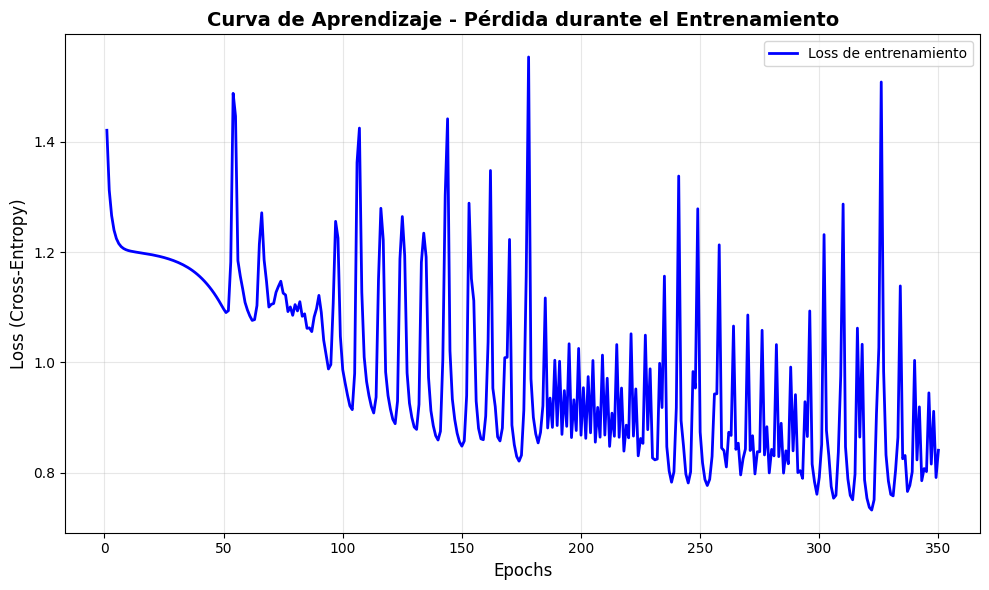


=== ESTADÍSTICAS DEL ENTRENAMIENTO ===
Loss inicial: 1.42075
Loss final: 0.84087
Reducción del loss: 40.82%
Loss promedio: 0.99245
Loss mínimo: 0.73246 (Epoch 322)


In [159]:
# Graficar la curva de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), l, 'b-', linewidth=2, label='Loss de entrenamiento')
plt.title('Curva de Aprendizaje - Pérdida durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (Cross-Entropy)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar estadísticas del entrenamiento
print(f"\n=== ESTADÍSTICAS DEL ENTRENAMIENTO ===")
print(f"Loss inicial: {l[0]:.5f}")
print(f"Loss final: {l[-1]:.5f}")
print(f"Reducción del loss: {((l[0] - l[-1]) / l[0] * 100):.2f}%")
print(f"Loss promedio: {np.mean(l):.5f}")
print(f"Loss mínimo: {min(l):.5f} (Epoch {l.index(min(l)) + 1})")

In [160]:
from sklearn.metrics import accuracy_score

def evaluate(x):
    model.eval()
    y_pred = model(x)
    y_probas = softmax(y_pred)
    return torch.argmax(y_probas, axis=1)

# Usar los datos de test correspondientes a los datos numéricos simples (7 características)
X_test_simple_tensor = torch.from_numpy(X_test_simple).float()
y_pred = evaluate(X_test_simple_tensor)

In [161]:
criterion = torch.nn.CrossEntropyLoss()

In [162]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

In [163]:

df_original = pd.read_csv(r"M:\UNIVERSIDAD 2025_2\INTELIGENCIA ATRIFICIAL\LAB5\csv_result_multiclase.csv")

numeric_cols = df_original.select_dtypes(include=['number']).columns.tolist()

# Obtener índices de características (sin 'id' ni 'Y')
feature_indices = []
y_index = None
id_index = None

for i, col in enumerate(numeric_cols):
    if col.lower() == 'y':
        y_index = i
    elif col.lower() == 'id':
        id_index = i
    else:
        feature_indices.append(i)

print(f"Índices de características: {feature_indices}")
print(f"Índice de Y: {y_index}")
print(f"Índice de id: {id_index}")

# Extraer características y target de los datos normalizados
X_normalized = normalized_data[:, feature_indices]  # Solo características
Y_normalized = normalized_data[:, y_index].long()   # Target

print(f"Forma de X normalizado: {X_normalized.shape}")
print(f"Forma de Y: {Y_normalized.shape}")

# Dividir en train/test 80%-20%
split_idx = int(0.8 * len(X_normalized))
X_train_norm = X_normalized[:split_idx]
X_test_norm = X_normalized[split_idx:]
Y_train_norm = Y_normalized[:split_idx]
Y_test_norm = Y_normalized[split_idx:]

# Configuración del modelo MEJORADA
D_in = X_normalized.shape[1]  # Número real de características
H = 32  # Reducir neuronas ocultas (más apropiado para el tamaño del dataset)
D_out = 4  # 4 clases

print(f"\n=== CONFIGURACIÓN DEL MODELO ===")
print(f"Entrada: {D_in} características")
print(f"Capa oculta: {H} neuronas")
print(f"Salida: {D_out} clases")

# Crear modelo con arquitectura más apropiada
model_final = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_final.parameters(), lr=0.005)  # Punto medio óptimo

# Entrenamiento
epochs = 400  # Reducir epochs ya que converge más rápido
log_each = 20
l_final = []
accuracy_train = []
model_final.train()

print(f"\n=== ENTRENAMIENTO ===")
for e in range(1, epochs+1):
    # forward
    y_pred = model_final(X_train_norm)
    loss = criterion(y_pred, Y_train_norm)
    l_final.append(loss.item())

    # Calcular accuracy durante entrenamiento
    with torch.no_grad():
        y_pred_classes = torch.argmax(y_pred, axis=1)
        acc = accuracy_score(Y_train_norm.numpy(), y_pred_classes.numpy())
        accuracy_train.append(acc)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {loss.item():.5f} Accuracy {acc:.4f}")

# Evaluación
model_final.eval()
with torch.no_grad():
    y_pred_final = model_final(X_test_norm)
    y_pred_classes_final = torch.argmax(y_pred_final, axis=1)
    
accuracy_final = accuracy_score(Y_test_norm.numpy(), y_pred_classes_final.numpy())

print(f"Accuracy: {accuracy_final:.4f} ({accuracy_final*100:.2f}%)")
print(f"Datos de entrenamiento: {X_train_norm.shape}")
print(f"Datos de test: {X_test_norm.shape}")

Índices de características: [1, 2, 3, 4, 5, 6, 7]
Índice de Y: 8
Índice de id: 0
Forma de X normalizado: torch.Size([20001, 7])
Forma de Y: torch.Size([20001])

=== CONFIGURACIÓN DEL MODELO ===
Entrada: 7 características
Capa oculta: 32 neuronas
Salida: 4 clases

=== ENTRENAMIENTO ===
Epoch 20/400 Loss 1.34279 Accuracy 0.3664
Epoch 20/400 Loss 1.34279 Accuracy 0.3664
Epoch 40/400 Loss 1.28742 Accuracy 0.4174
Epoch 40/400 Loss 1.28742 Accuracy 0.4174
Epoch 60/400 Loss 1.23754 Accuracy 0.5523
Epoch 60/400 Loss 1.23754 Accuracy 0.5523
Epoch 80/400 Loss 1.19246 Accuracy 0.6311
Epoch 80/400 Loss 1.19246 Accuracy 0.6311
Epoch 100/400 Loss 1.15160 Accuracy 0.6333
Epoch 120/400 Loss 1.11451 Accuracy 0.6336
Epoch 100/400 Loss 1.15160 Accuracy 0.6333
Epoch 120/400 Loss 1.11451 Accuracy 0.6336
Epoch 140/400 Loss 1.08081 Accuracy 0.6336
Epoch 160/400 Loss 1.05018 Accuracy 0.6336
Epoch 140/400 Loss 1.08081 Accuracy 0.6336
Epoch 160/400 Loss 1.05018 Accuracy 0.6336
Epoch 180/400 Loss 1.02233 Accurac

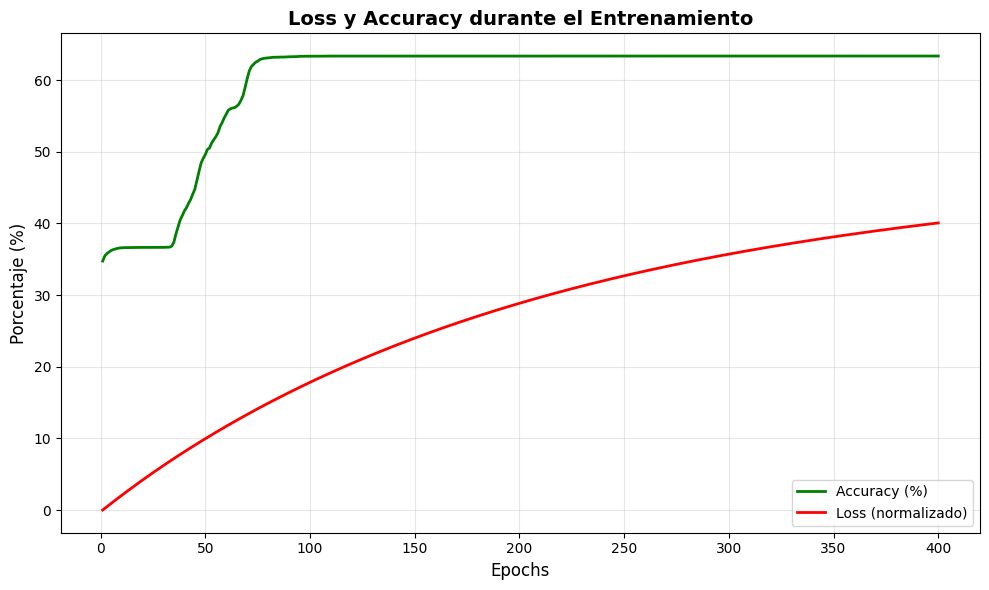

In [164]:
# Curva de aprendizaje
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Normalizar loss para que esté en escala similar al accuracy
loss_normalized = [(1 - (loss / max(l_final))) * 100 for loss in l_final]
plt.plot(range(1, epochs + 1), [acc * 100 for acc in accuracy_train], 'g-', linewidth=2, label='Accuracy (%)')
plt.plot(range(1, epochs + 1), loss_normalized, 'r-', linewidth=2, label='Loss (normalizado)')
plt.title('Loss y Accuracy durante el Entrenamiento', fontsize=14, fontweight='bold')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Porcentaje (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [165]:
# creamos una clase que hereda de `torch.nn.Module`

class ModeloPersonalizado(torch.nn.Module):

    # constructor
    def __init__(self, D_in, H, D_out):

        # llamamos al constructor de la clase madre
        super(ModeloPersonalizado, self).__init__()

        # definimos nuestras capas
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)

    # lógica para calcular las salidas de la red
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [166]:
model = ModeloPersonalizado(7, 32, 4)
# Codigo para saber si el modelo esta funcionando con las dimensiones correctas
x_prueba = torch.randn(500, 7)  # 7 características como el modelo
print("Forma de entrada:", x_prueba.shape)
outputs = model(x_prueba)
print("Forma de salida:", outputs.shape)
print("Esto es correcto: (500 muestras, 4 clases)")

Forma de entrada: torch.Size([500, 7])
Forma de salida: torch.Size([500, 4])
Esto es correcto: (500 muestras, 4 clases)


In [167]:
# Entrenamiento del modelo personalizado
model.train()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # LR más conservador

# Usar los datos correctos (7 características)
X_t = X_t_simple  # Datos de entrenamiento (7 características)
Y_t = Y_t_simple  # Labels de entrenamiento

epochs = 100
log_each = 10
l = []

print(f"Entrenando con: {X_t.shape}")
for e in range(1, epochs+1):
    # forward
    y_pred = model(X_t)
    
    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())
    
    # ponemos a cero los gradientes
    optimizer.zero_grad()
    
    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()
    
    # update de los pesos
    optimizer.step()
    
    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

# Evaluación en datos de test
model.eval()
with torch.no_grad():
    X_test_tensor = torch.from_numpy(X_test_simple).float()
    y_pred_test = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred_test, axis=1)
    
    test_accuracy = accuracy_score(y_test_simple, y_pred_classes.numpy())
    print(f"\nAccuracy en test: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Entrenando con: torch.Size([16000, 7])
Epoch 10/100 Loss 1.35254
Epoch 20/100 Loss 1.34553
Epoch 30/100 Loss 1.33900
Epoch 40/100 Loss 1.33291
Epoch 50/100 Loss 1.32722
Epoch 60/100 Loss 1.32191
Epoch 70/100 Loss 1.31693
Epoch 40/100 Loss 1.33291
Epoch 50/100 Loss 1.32722
Epoch 60/100 Loss 1.32191
Epoch 70/100 Loss 1.31693
Epoch 80/100 Loss 1.31228
Epoch 90/100 Loss 1.30791
Epoch 100/100 Loss 1.30381

Accuracy en test: 0.4009 (40.09%)
Epoch 80/100 Loss 1.31228
Epoch 90/100 Loss 1.30791
Epoch 100/100 Loss 1.30381

Accuracy en test: 0.4009 (40.09%)


In [168]:
class ModelCustom2(torch.nn.Module):

    def __init__(self, D_in, H, D_out):
        super(ModelCustom2, self).__init__()
        self.fc1 = torch.nn.Linear(D_in, H)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(H, D_out)

    def forward(self, x):
        x1 = self.fc1(x)
        x = self.relu(x1)
        x = self.fc2(x + x1)
        return x

In [169]:
# Crear modelo personalizado ModelCustom2 con dimensiones correctas
model_custom2 = ModelCustom2(7, 32, 4)  # 7 características, 32 ocultas, 4 clases
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_custom2.parameters(), lr=0.01)  # LR conservador

# Usar datos correctos (7 características)
X_t = X_t_simple  # Datos de entrenamiento (7 características)
Y_t = Y_t_simple  # Labels de entrenamiento

epochs = 100
log_each = 10
l = []
model_custom2.train()

print(f"Entrenando ModelCustom2 con: {X_t.shape}")
for e in range(1, epochs+1):
    # forward
    y_pred = model_custom2(X_t)

    # loss
    loss = criterion(y_pred, Y_t)
    l.append(loss.item())

    # ponemos a cero los gradientes
    optimizer.zero_grad()

    # Backprop (calculamos todos los gradientes automáticamente)
    loss.backward()

    # update de los pesos
    optimizer.step()

    if not e % log_each:
        print(f"Epoch {e}/{epochs} Loss {np.mean(l):.5f}")

# Evaluación en datos de test
model_custom2.eval()
with torch.no_grad():
    X_test_tensor = torch.from_numpy(X_test_simple).float()
    y_pred_test = model_custom2(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred_test, axis=1)
    
    test_accuracy = accuracy_score(y_test_simple, y_pred_classes.numpy())
    print(f"\nAccuracy ModelCustom2: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

Entrenando ModelCustom2 con: torch.Size([16000, 7])
Epoch 10/100 Loss 1.43466
Epoch 20/100 Loss 1.41400
Epoch 30/100 Loss 1.39633
Epoch 20/100 Loss 1.41400
Epoch 30/100 Loss 1.39633
Epoch 40/100 Loss 1.38101
Epoch 50/100 Loss 1.36760
Epoch 40/100 Loss 1.38101
Epoch 50/100 Loss 1.36760
Epoch 60/100 Loss 1.35577
Epoch 70/100 Loss 1.34526
Epoch 60/100 Loss 1.35577
Epoch 70/100 Loss 1.34526
Epoch 80/100 Loss 1.33586
Epoch 90/100 Loss 1.32742
Epoch 100/100 Loss 1.31980

Accuracy ModelCustom2: 0.2484 (24.84%)
Epoch 80/100 Loss 1.33586
Epoch 90/100 Loss 1.32742
Epoch 100/100 Loss 1.31980

Accuracy ModelCustom2: 0.2484 (24.84%)


De esta manera, tenemos mucha flexibilidad para definir nuestras redes.

## Accediendo a las capas de una red

In [170]:
model

ModeloPersonalizado(
  (fc1): Linear(in_features=7, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=4, bias=True)
)

In [171]:
model.fc1

Linear(in_features=7, out_features=32, bias=True)

También podemos acceder directamente a los tensores que contienen los parámetros con las propiedades adecuadas

In [172]:
model.fc1.weight

Parameter containing:
tensor([[-0.2681, -0.1779,  0.3179, -0.2917, -0.0198,  0.1228,  0.0009],
        [-0.3026,  0.0386, -0.2001, -0.1887,  0.2160,  0.2011,  0.1000],
        [-0.1759,  0.3675, -0.1349, -0.3035, -0.3585, -0.2498,  0.0834],
        [-0.0785,  0.2491, -0.1683,  0.3521, -0.1592,  0.1622, -0.1771],
        [ 0.0601,  0.1157, -0.3460, -0.2257,  0.3636,  0.0707, -0.2339],
        [ 0.0920,  0.3134, -0.1638,  0.0007, -0.2935,  0.2181,  0.3458],
        [-0.1072, -0.2434, -0.2717,  0.3149, -0.2472,  0.0295,  0.1997],
        [-0.1566, -0.2263, -0.3590,  0.3123,  0.0359, -0.1538, -0.3723],
        [ 0.2719, -0.0041,  0.1116, -0.1598,  0.3599, -0.0067, -0.0495],
        [ 0.2313,  0.2767,  0.3381,  0.2138,  0.2708, -0.1692,  0.1719],
        [ 0.2864,  0.2505, -0.1917, -0.2963, -0.3594, -0.1150, -0.2568],
        [ 0.3725,  0.1208, -0.2850, -0.2506, -0.1148,  0.2065, -0.2503],
        [-0.1349,  0.0662, -0.2191,  0.1844, -0.0223, -0.0254,  0.3665],
        [-0.2045,  0.1066,  0

In [173]:
model.fc1.bias

Parameter containing:
tensor([ 0.1593, -0.1269,  0.2188,  0.1374,  0.0010, -0.2065,  0.2047,  0.1107,
        -0.2950,  0.3692, -0.3096, -0.0973, -0.3057,  0.1627,  0.3211,  0.0973,
        -0.0791,  0.2446,  0.3773,  0.2819,  0.2053, -0.3433, -0.2133,  0.1644,
         0.0322, -0.0464, -0.1789,  0.2795,  0.0697,  0.2589,  0.0985, -0.3013],
       requires_grad=True)

Es posible sobreescribir una capa de la siguiente manera

In [174]:
model.fc2 = torch.nn.Linear(100, 1)

model

ModeloPersonalizado(
  (fc1): Linear(in_features=7, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=1, bias=True)
)

In [175]:
# obtener una lista con las capas de una red

list(model.children())

[Linear(in_features=7, out_features=32, bias=True),
 ReLU(),
 Linear(in_features=100, out_features=1, bias=True)]

In [176]:
# crear nueva red a partir de la lista (excluyendo las útlimas dos capa)

new_model = torch.nn.Sequential(*list(model.children())[:-2])
new_model

Sequential(
  (0): Linear(in_features=7, out_features=32, bias=True)
)

In [177]:
# crear nueva red a partir de la lista (excluyendo las útlima capa)

new_model = torch.nn.ModuleList(list(model.children())[:-1])
new_model

ModuleList(
  (0): Linear(in_features=7, out_features=32, bias=True)
  (1): ReLU()
)

## Resumen

En este post hemos visto la funcionalidad que `Pytorch` nos ofrece a la hora de definir y entrenar nuestras `redes neuronales`. El paquete `torch.nn` contiene todo lo necesario para diseñar nuestros modelos, ya sea de manera secuencial o con una clase *custom* para arquitecturas más complicadas. También nos da muchas funciones de pérdida que podemos usar directamente para entrenar las redes. Te recomiendo encarecidamente que le eches un vistazo a la [documentación](https://pytorch.org/docs/stable/nn.html) par hacerte una idea de todo lo que puedes hacer. También hemos visto como el paquete `torch.optim` nos oferece algoritmos de optimización que también nos hacen la vida más fácil a la hora de entrenar nuestras redes.